# R v4.5

In [ ]:
packageVersion("nichenetr")

[1] ‘2.2.0’

# NichenetR

In [ ]:
library(nichenetr)

In [ ]:

file_id <- "1-16wnF3IUg-6qdoLa5TvBxbbP0jU6AGv"
file_name <- "sc_RCC.h5ad"

# Download the file
drive_download(as_id(file_id), path = file_name ,overwrite = TRUE )

File downloaded:

• XYA_count_all_subtype.h5ad <id: 1-16wnF3IUg-6qdoLa5TvBxbbP0jU6AGv>

Saved locally as:

• sc_RCC.h5ad



In [ ]:
organism <- "human"

if(organism == "human"){
  lr_network <- readRDS(url("https://zenodo.org/record/7074291/files/lr_network_human_21122021.rds"))
}

In [ ]:
file_id <- "1SY29aE-0__CqKbDAexBsxVXa1mVYMH-9"
file_name <- "ligand_target_matrix_nsga2r_final.rds"

drive_download(as_id(file_id), path = file_name ,overwrite = TRUE )

File downloaded:

• ligand_target_matrix_nsga2r_final.rds <id: 1SY29aE-0__CqKbDAexBsxVXa1mVYMH-9>

Saved locally as:

• ligand_target_matrix_nsga2r_final.rds



In [ ]:
ligand_target_matrix <- readRDS("/content/ligand_target_matrix_nsga2r_final.rds")

In [ ]:
file_id <- "1XmJ6-GAOA_Ra1Y83iU6IkzqzQh7zTZcN"
file_name <- "1.rds"
drive_download(as_id(file_id), path = file_name ,overwrite = TRUE )

File downloaded:

• weighted_networks_nsga2r_final.rds <id: 1XmJ6-GAOA_Ra1Y83iU6IkzqzQh7zTZcN>

Saved locally as:

• 1.rds



In [ ]:
weighted_networks <- readRDS("/content/1.rds")

In [ ]:
lr_network <- lr_network %>% distinct(from, to)
head(lr_network)

ligand_target_matrix[1:5,1:5] # target genes in rows, ligands in columns
head(weighted_networks$lr_sig) # interactions and their weights in the ligand-receptor + signaling network
head(weighted_networks$gr) # interactions and their weights in the gene regulatory network

from,to
<chr>,<chr>
A2M,MMP2
A2M,MMP9
A2M,LRP1
A2M,KLK3
AANAT,MTNR1A
AANAT,MTNR1B


,A2M,AANAT,ABCA1,ACE,ACE2
A-GAMMA3'E,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.000000000
A1BG,0.0018503922,0.0011108718,0.0014225077,0.0028594037,0.001139013
A1BG-AS1,0.0007400797,0.0004677614,0.0005193137,0.0007836698,0.000375007
A1CF,0.0024799266,0.0013026348,0.0020420890,0.0047921048,0.003273375
A2M,0.0084693452,0.0040689323,0.0064256379,0.0105191365,0.005719199


from,to,weight
<chr>,<chr>,<dbl>
A-GAMMA3'E,ACTG1P11,0.10018411
A-GAMMA3'E,AXIN2,0.08687722
A-GAMMA3'E,BUB1B-PAK6,0.09322200
A-GAMMA3'E,CEACAM7,0.07927829
A-GAMMA3'E,CHRNA1,0.09010287
A-GAMMA3'E,DTX2P1,0.09758541


from,to,weight
<chr>,<chr>,<dbl>
A1BG,A2M,0.16500026
AAAS,GFAP,0.09064868
AADAC,CTAG1B,0.10358772
AADAC,CYP3A4,0.17727654
AADAC,DIRAS3,0.09359021
AADAC,IRF8,0.08918009


In [ ]:
OBJ <- zellkonverter::readH5AD('/content/sc_RCC.h5ad')

+ /root/.cache/R/basilisk/1.18.0/0/bin/conda create --yes --prefix /root/.cache/R/basilisk/1.18.0/zellkonverter/1.16.0/zellkonverterAnnDataEnv-0.10.9 'python=3.12.7' --quiet -c conda-forge --override-channels

+ /root/.cache/R/basilisk/1.18.0/0/bin/conda install --yes --prefix /root/.cache/R/basilisk/1.18.0/zellkonverter/1.16.0/zellkonverterAnnDataEnv-0.10.9 'python=3.12.7' -c conda-forge --override-channels

+ /root/.cache/R/basilisk/1.18.0/0/bin/conda install --yes --prefix /root/.cache/R/basilisk/1.18.0/zellkonverter/1.16.0/zellkonverterAnnDataEnv-0.10.9 -c conda-forge 'python=3.12.7' 'anndata=0.10.9' 'h5py=3.12.1' 'hdf5=1.14.3' 'natsort=8.4.0' 'numpy=2.1.2' 'packaging=24.1' 'pandas=2.2.3' 'python=3.12.7' 'scipy=1.14.1' --override-channels

ℹ Using stored X_name value 'counts'



In [ ]:
OBJ

class: SingleCellExperiment 
dim: 27705 44681 
metadata(17): Major_Type_colors Sample_type_colors ... umap
  umap_density_STC2_EXP_params
assays(1): counts
rownames(27705): AL627309.1 AL627309.5 ... C17orf112 PHEX-AS1
rowData names(6): n_cells mt ... pct_dropout_by_counts total_counts
colnames(44681): JA-1_AAACCCACACCTCAGG-1 JA-1_AAACCCACAGGCAATG-1 ...
  PCT-3_TTTGTTGTCCTAGCTC-1 PCT-3_TTTGTTGTCGCAGTGC-1
colData names(21): orig.ident celltype ... subtype subtype2
reducedDimNames(3): X_pca X_pca_harmony X_umap
mainExpName: NULL
altExpNames(0):

In [ ]:
table(rownames(OBJ))

duplicated_genes <- duplicated(rownames(OBJ))
duplicated_genes_names <- rownames(OBJ)[duplicated_genes]
print(duplicated_genes_names)

OBJ_unique_first <- OBJ[!duplicated(rownames(OBJ)), ]
OBJ_unique_last <- OBJ[!duplicated(rownames(OBJ), fromLast = TRUE), ]

table(rownames(OBJ_unique_first))
table(rownames(OBJ_unique_last))
print(OBJ_unique_first)
print(OBJ_unique_last)

In [ ]:
OBJ_unique_first

class: SingleCellExperiment 
dim: 27705 44681 
metadata(17): Major_Type_colors Sample_type_colors ... umap
  umap_density_STC2_EXP_params
assays(1): counts
rownames(27705): AL627309.1 AL627309.5 ... C17orf112 PHEX-AS1
rowData names(6): n_cells mt ... pct_dropout_by_counts total_counts
colnames(44681): JA-1_AAACCCACACCTCAGG-1 JA-1_AAACCCACAGGCAATG-1 ...
  PCT-3_TTTGTTGTCCTAGCTC-1 PCT-3_TTTGTTGTCGCAGTGC-1
colData names(21): orig.ident celltype ... subtype subtype2
reducedDimNames(3): X_pca X_pca_harmony X_umap
mainExpName: NULL
altExpNames(0):

In [ ]:
OBJ <- as.Seurat(OBJ_unique_first, counts = "counts", data = "counts")

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from X_pca_ to Xpca_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from X_pca_harmony_ to Xpcaharmony_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from X_umap_ to Xumap_”


In [ ]:
OBJ <- NormalizeData(OBJ, normalization.method = "LogNormalize", scale.factor = 10000)

In [ ]:
OBJ <- FindVariableFeatures(OBJ, selection.method = "vst", nfeatures = 2000)

In [ ]:
OBJ$aggregate = OBJ$smoke

In [ ]:
OBJ$celltype  = OBJ$subtype

In [ ]:
OBJ <- alias_to_symbol_seurat(OBJ, "human")

In [ ]:
Idents(OBJ) <- OBJ$celltype

In [ ]:
celltype <- OBJ$celltype
celltype <- gsub("\\$\\^\\{\\+\\}\\$", "<sup>+</sup>", celltype)
OBJ$celltype <- celltype
table(OBJ$celltype)


          ADH1B+CAF             B cells    CD4<sup>+</sup>T    CD8<sup>+</sup>T 
               1106                4049                9747               13395 
        COL15A1+CAF                  DC                Endo   FAP<sup>+</sup>EC 
                223                 513                  31                 141 
 FLT1<sup>+</sup>EC          immuetumor ITGA5<sup>+</sup>EC         Lympatic_EC 
                290                 210                  37                 145 
         Mast cells            MT+Fibro       Myeloid cells         Neutrophils 
                530                1005                1639                 522 
           NK cells          Normal_Epi           Pericytes        Plasma cells 
               1308                1293                 817                2275 
POSTN<sup>+</sup>EC  RGS5<sup>+</sup>EC           RPL+Fibro           S100A+CAF 
                722                  43                 380                1888 
         STC2+myCAF        

In [ ]:
merge_dict <- c(
  "stemjxEMC" = "Tumor_C1",
  "immuetumor" = "Tumor_C4",
  "stemproEMC_C0" = "Tumor_C2",
  "stemproEMC_C1" = "Tumor_C3",
  "stemEMCfhpz" = "Tumor_C5",
  "stemhc" = "Tumor_C6"
)

OBJ$celltype <- ifelse(OBJ$celltype %in% names(merge_dict),
                       merge_dict[OBJ$celltype],
                       OBJ$celltype)


In [ ]:
table(OBJ$celltype)


          ADH1B+CAF             B cells    CD4<sup>+</sup>T    CD8<sup>+</sup>T 
               1106                4049                9747               13395 
        COL15A1+CAF                  DC                Endo   FAP<sup>+</sup>EC 
                223                 513                  31                 141 
 FLT1<sup>+</sup>EC ITGA5<sup>+</sup>EC         Lympatic_EC          Mast cells 
                290                  37                 145                 530 
           MT+Fibro       Myeloid cells         Neutrophils            NK cells 
               1005                1639                 522                1308 
         Normal_Epi           Pericytes        Plasma cells POSTN<sup>+</sup>EC 
               1293                 817                2275                 722 
 RGS5<sup>+</sup>EC           RPL+Fibro           S100A+CAF          STC2+myCAF 
                 43                 380                1888                 948 
           Tumor_C1        

In [ ]:
library(ggtext)
Idents(OBJ) <- OBJ$celltype

In [ ]:
cell_types <- levels(factor(OBJ$celltype))
caf_types <- cell_types[grepl("EC", cell_types, ignore.case = TRUE)]
print(paste0("'", paste(caf_types, collapse = "','"), "'"))

[1] "'FAP<sup>+</sup>EC','FLT1<sup>+</sup>EC','ITGA5<sup>+</sup>EC','Lympatic_EC','POSTN<sup>+</sup>EC','RGS5<sup>+</sup>EC'"


In [ ]:
receiver = "ITGA5<sup>+</sup>EC"
expressed_genes_receiver <- get_expressed_genes(receiver, OBJ, pct = 0.05)

In [ ]:
length(expressed_genes_receiver)

[1] 11210

In [ ]:
all_receptors <- unique(lr_network$to)
expressed_receptors <- intersect(all_receptors, expressed_genes_receiver)

potential_ligands <- lr_network %>% filter(to %in% expressed_receptors) %>% pull(from) %>% unique()

In [ ]:
sender_celltypes <- c('Tumor_C1','Tumor_C2','Tumor_C3','Tumor_C4','Tumor_C5','Tumor_C6')

# Use lapply to get the expressed genes of every sender cell type separately here
list_expressed_genes_sender <- sender_celltypes %>% unique() %>% lapply(get_expressed_genes, OBJ, 0.05)
expressed_genes_sender <- list_expressed_genes_sender %>% unlist() %>% unique()

potential_ligands_focused <- intersect(potential_ligands, expressed_genes_sender)

length(expressed_genes_sender)
length(potential_ligands)
length(potential_ligands_focused)

[1] 12849

[1] 870

[1] 406

In [ ]:
table(OBJ$aggregate)


non_smoker     smoker 
     13969      30712 

In [ ]:
OBJ$majorcelltype <- ifelse(grepl("EC", OBJ$celltype), "EC", "other")

In [ ]:
table(OBJ$majorcelltype)


   EC other 
 1378 43303 

In [ ]:
condition_oi <-  "smoker"
condition_reference <- "non_smoker"
seurat_obj_receiver <- subset(OBJ, subset = majorcelltype == "EC")


table(seurat_obj_receiver$majorcelltype)
DE_table_receiver <-  FindMarkers(object = seurat_obj_receiver,
                                  ident.1 = condition_oi, ident.2 = condition_reference,
                                  group.by = "aggregate",
                                  min.pct = 0.05) %>% rownames_to_column("gene")
seurat_obj_receiver <- subset(OBJ, idents = receiver)
table(OBJ$aggregate)


  EC 
1378 

For a (much!) faster implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the presto package
--------------------------------------------
install.packages('devtools')
devtools::install_github('immunogenomics/presto')
--------------------------------------------
After installation of presto, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session




non_smoker     smoker 
     13969      30712 

In [ ]:
geneset_oi <- DE_table_receiver %>% filter(p_val_adj <= 0.05 & abs(avg_log2FC) >= 0.5) %>% pull(gene)
geneset_oi <- geneset_oi %>% .[. %in% rownames(ligand_target_matrix)]

In [ ]:
background_expressed_genes <- expressed_genes_receiver %>% .[. %in% rownames(ligand_target_matrix)]
length(background_expressed_genes)
length(geneset_oi)

[1] 10605

[1] 431

## sender-agnostic

In [ ]:
ligand_activities <- predict_ligand_activities(geneset = geneset_oi,
                                               background_expressed_genes = background_expressed_genes,
                                               ligand_target_matrix = ligand_target_matrix,
                                               potential_ligands = potential_ligands)

ligand_activities <- ligand_activities %>% arrange(-aupr_corrected) %>% mutate(rank = rank(dplyr::desc(aupr_corrected)))
ligand_activities

test_ligand,auroc,aupr,aupr_corrected,pearson,rank
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TNFSF10,0.7027059,0.1711031,0.13049640,0.2336919,1
EGF,0.7003964,0.1704181,0.12981134,0.2396654,2
IL1A,0.7108838,0.1583890,0.11778223,0.2260324,3
C4BPA,0.6798405,0.1543663,0.11375956,0.2010098,4
ICAM1,0.6981608,0.1474025,0.10679578,0.1809709,5
CD7,0.6971173,0.1472231,0.10661638,0.1635398,6
TGFBI,0.6844898,0.1471432,0.10653642,0.1886973,7
IL1B,0.7017545,0.1457612,0.10515444,0.2183140,8
TNF,0.7064000,0.1457315,0.10512477,0.2051595,9


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


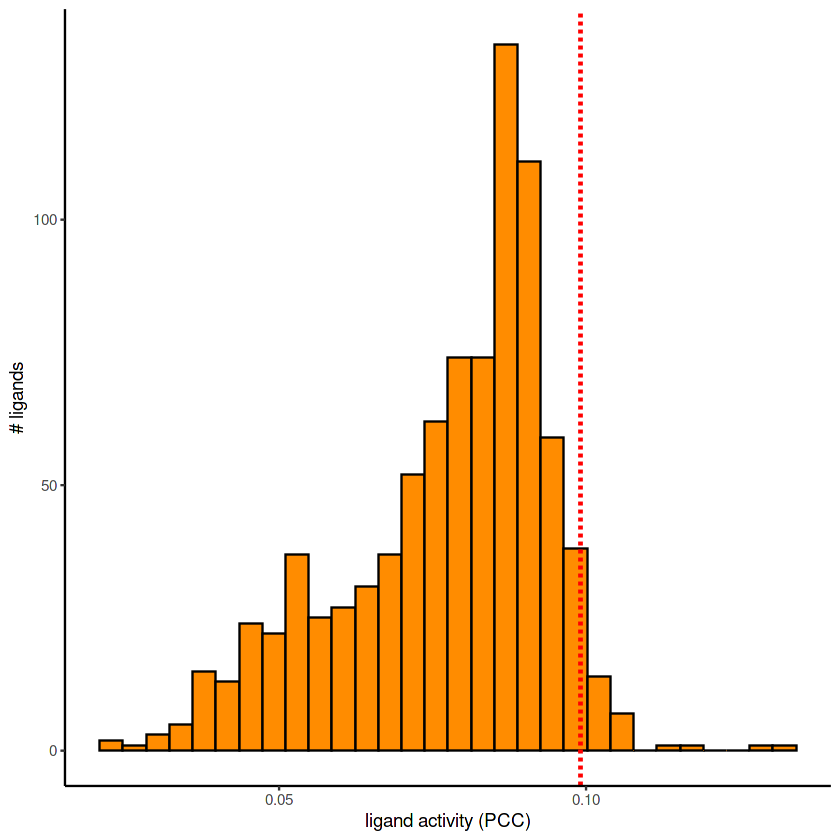

In [ ]:
p_hist_lig_activity <- ggplot(ligand_activities, aes(x=aupr_corrected)) +
  geom_histogram(color="black", fill="darkorange")  +
  geom_vline(aes(xintercept=min(ligand_activities %>% top_n(30, aupr_corrected) %>% pull(aupr_corrected))),
             color="red", linetype="dashed", size=1) +
  labs(x="ligand activity (PCC)", y = "# ligands") +
  theme_classic()
p_hist_lig_activity

In [ ]:
best_upstream_ligands <- ligand_activities %>% top_n(30, aupr_corrected) %>% arrange(-aupr_corrected) %>% pull(test_ligand)

In [ ]:
library(dplyr)

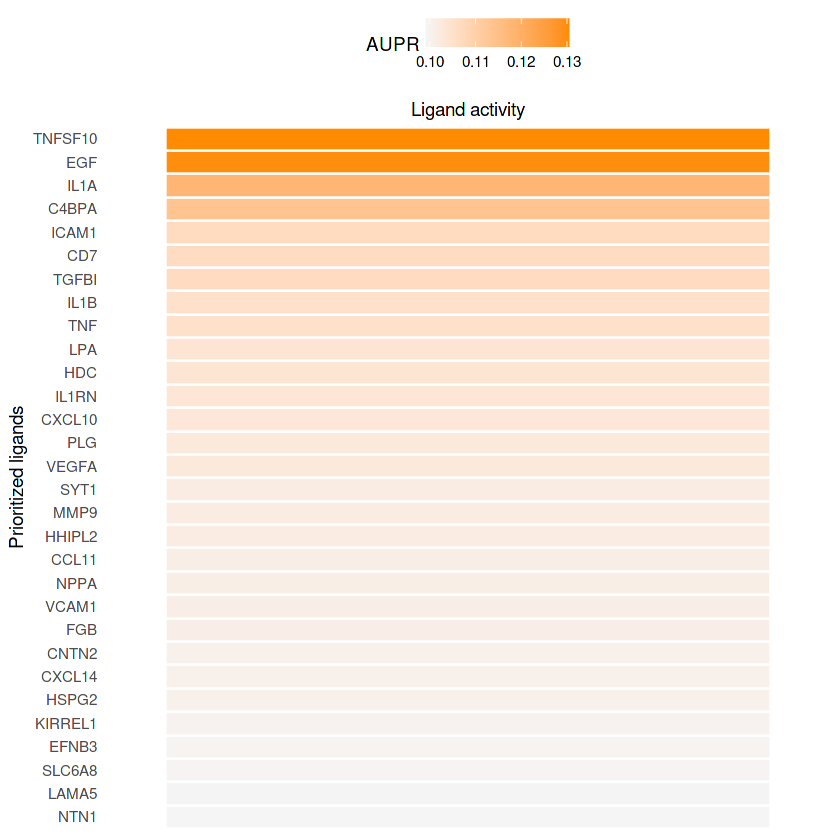

In [ ]:
vis_ligand_aupr <- ligand_activities %>% filter(test_ligand %in% best_upstream_ligands) %>%
  column_to_rownames("test_ligand") %>% dplyr::select(aupr_corrected) %>% arrange(aupr_corrected) %>% as.matrix(ncol = 1)

(make_heatmap_ggplot(vis_ligand_aupr,
                     "Prioritized ligands", "Ligand activity",
                     legend_title = "AUPR", color = "darkorange") +
    theme(axis.text.x.top = element_blank()))

In [ ]:
active_ligand_target_links_df <- best_upstream_ligands %>%
  lapply(get_weighted_ligand_target_links,
         geneset = geneset_oi,
         ligand_target_matrix = ligand_target_matrix,
         n = 100) %>%
  bind_rows() %>% drop_na()

nrow(active_ligand_target_links_df)
head(active_ligand_target_links_df)

[1] 889

ligand,target,weight
<chr>,<chr>,<dbl>
TNFSF10,BAD,0.09758347
TNFSF10,BHLHE40,0.08493930
TNFSF10,CDKN1A,0.11943356
TNFSF10,CXCL8,0.23733584
TNFSF10,DUSP1,0.14420286
TNFSF10,DUSP5,0.14367317


[1] 105

,TNFSF10,IL1A,IL1B,TNF,SLC6A8,EGF,VEGFA,HSPG2,EFNB3,LAMA5,⋯,NTN1,ICAM1,PLG,CNTN2,CXCL10,NPPA,VCAM1,IL1RN,TGFBI,LPA
CXCL2,0.07285889,0.13143335,0.1729389,0.2025151,0,0.1752195,0.07184803,0.00000000,0.00000000,0.00000000,⋯,0.00000000,0.01249457,0.00000000,0.01757919,0.00000000,0.00000000,0.00000000,0.01451067,0.00000000,0.00000000
ATF3,0.07501212,0.07584527,0.1175533,0.1672517,0,0.1175716,0.09309823,0.00000000,0.00000000,0.00000000,⋯,0.00000000,0.01657530,0.00000000,0.02505492,0.01132437,0.01358674,0.00000000,0.01586713,0.01159943,0.01317021
IER3,0.15126099,0.15237270,0.1945656,0.2810165,0,0.1867944,0.11486973,0.00000000,0.00000000,0.00000000,⋯,0.00000000,0.01783361,0.00000000,0.02591288,0.01261302,0.01447548,0.00000000,0.02042181,0.01262982,0.01324397
TNFAIP3,0.14903154,0.14897075,0.1917409,0.2769292,0,0.1456605,0.14629989,0.00000000,0.00000000,0.00000000,⋯,0.00000000,0.01664053,0.00000000,0.02403878,0.00000000,0.01244524,0.00000000,0.01653383,0.00000000,0.00000000
EGR1,0.15256657,0.20969757,0.1819910,0.1826487,0,0.2197347,0.18412318,0.01168579,0.01204792,0.01202434,⋯,0.01377648,0.02165265,0.07121684,0.03033139,0.01882428,0.01985670,0.01215658,0.02013344,0.01566956,0.07441136
CXCL8,0.23733584,0.23900276,0.2822962,0.2744762,0,0.2471806,0.24773749,0.00000000,0.00000000,0.00000000,⋯,0.01127688,0.01898534,0.00000000,0.08186287,0.06934837,0.01544490,0.00000000,0.02131390,0.00000000,0.07075363


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


[1]  30 105

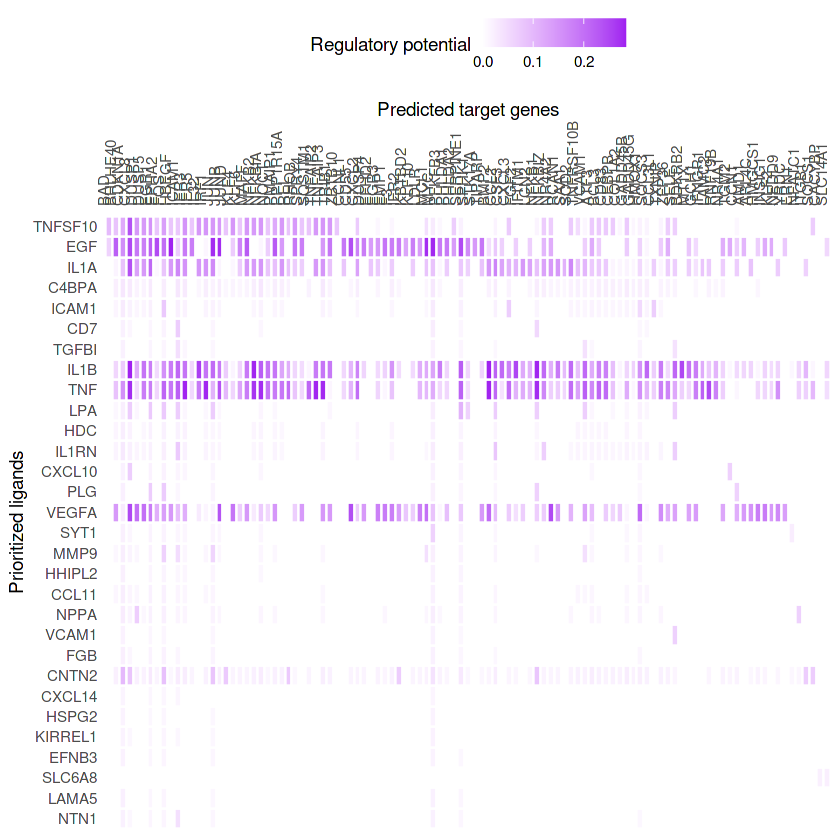

In [ ]:
active_ligand_target_links <- prepare_ligand_target_visualization(
  ligand_target_df = active_ligand_target_links_df,
  ligand_target_matrix = ligand_target_matrix,
  cutoff = 0.33)     # diy

nrow(active_ligand_target_links)
head(active_ligand_target_links)


order_ligands <- intersect(best_upstream_ligands, colnames(active_ligand_target_links)) %>% rev()
order_targets <- active_ligand_target_links_df$target %>% unique() %>% intersect(rownames(active_ligand_target_links))

vis_ligand_target <- t(active_ligand_target_links[order_targets,order_ligands])

make_heatmap_ggplot(vis_ligand_target, "Prioritized ligands", "Predicted target genes",
                    color = "purple", legend_title = "Regulatory potential") +
  scale_fill_gradient2(low = "whitesmoke",  high = "purple")
dim(vis_ligand_target)

In [ ]:
ligand_receptor_links_df <- get_weighted_ligand_receptor_links(
  best_upstream_ligands, expressed_receptors,
  lr_network, weighted_networks$lr_sig)

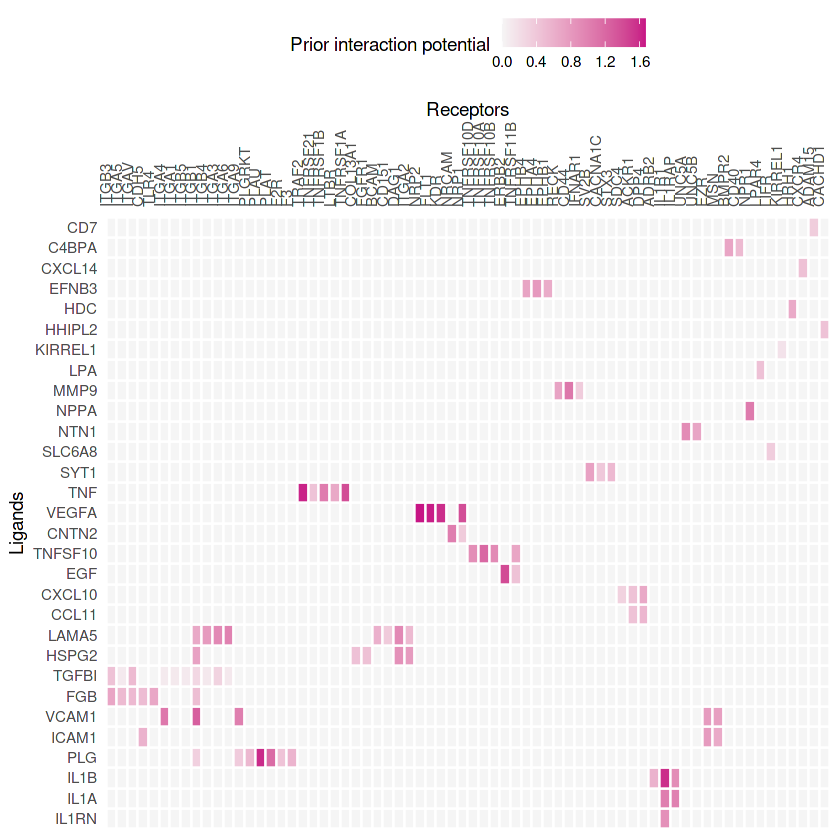

In [ ]:
vis_ligand_receptor_network <- prepare_ligand_receptor_visualization(
  ligand_receptor_links_df,
  best_upstream_ligands,
  order_hclust = "both")

(make_heatmap_ggplot(t(vis_ligand_receptor_network),
                     y_name = "Ligands", x_name = "Receptors",
                     color = "mediumvioletred", legend_title = "Prior interaction potential"))

## Sender-focused approach

In [ ]:
best_upstream_ligands <- ligand_activities %>% top_n(30, aupr_corrected) %>% arrange(-aupr_corrected) %>% pull(test_ligand) #30

In [ ]:
best_upstream_ligands

[1] "TNFSF10" "EGF"     "IL1A"    "C4BPA"   "ICAM1"   "CD7"     "TGFBI"  
 [8] "IL1B"    "TNF"     "LPA"     "HDC"     "IL1RN"   "CXCL10"  "PLG"    
[15] "VEGFA"   "SYT1"    "MMP9"    "HHIPL2"  "CCL11"   "NPPA"    "VCAM1"  
[22] "FGB"     "CNTN2"   "CXCL14"  "HSPG2"   "KIRREL1" "EFNB3"   "SLC6A8" 
[29] "LAMA5"   "NTN1"

In [ ]:
ligand_activities_all <- ligand_activities
best_upstream_ligands_all <- best_upstream_ligands

ligand_activities <- ligand_activities %>% filter(test_ligand %in% potential_ligands_focused)
best_upstream_ligands <- ligand_activities %>% top_n(30, aupr_corrected) %>% arrange(-aupr_corrected) %>% #30
  pull(test_ligand) %>% unique()

In [ ]:
ligand_activities_all

test_ligand,auroc,aupr,aupr_corrected,pearson,rank
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TNFSF10,0.7027059,0.1711031,0.13049640,0.2336919,1
EGF,0.7003964,0.1704181,0.12981134,0.2396654,2
IL1A,0.7108838,0.1583890,0.11778223,0.2260324,3
C4BPA,0.6798405,0.1543663,0.11375956,0.2010098,4
ICAM1,0.6981608,0.1474025,0.10679578,0.1809709,5
CD7,0.6971173,0.1472231,0.10661638,0.1635398,6
TGFBI,0.6844898,0.1471432,0.10653642,0.1886973,7
IL1B,0.7017545,0.1457612,0.10515444,0.2183140,8
TNF,0.7064000,0.1457315,0.10512477,0.2051595,9


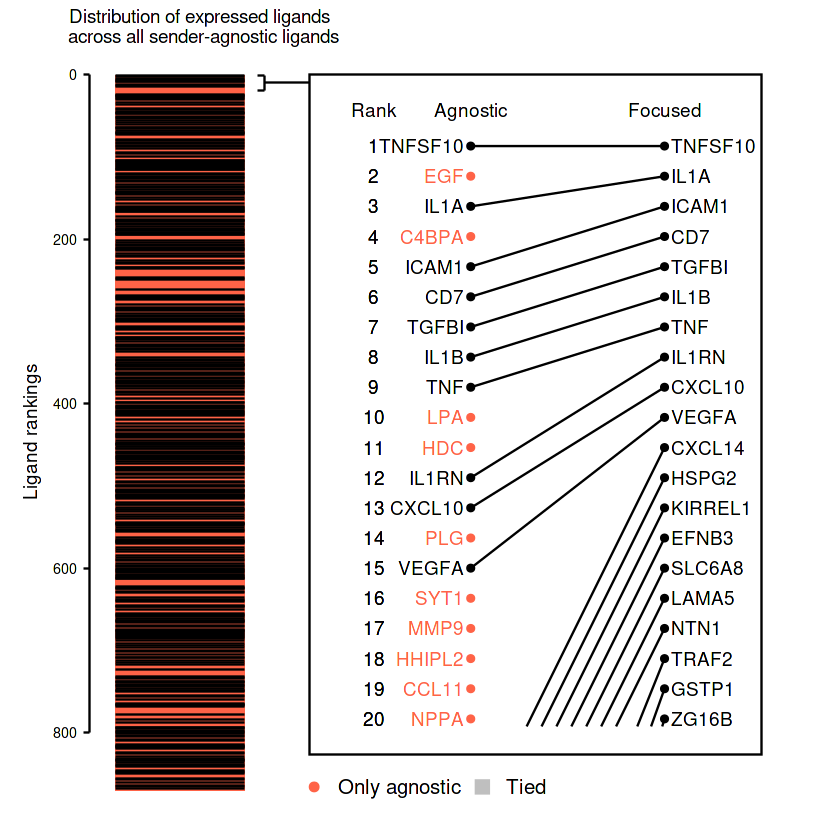

In [ ]:
plot <- make_line_plot(ligand_activities = ligand_activities_all,
                       potential_ligands = potential_ligands_focused) +
        theme(plot.title = element_text(size=11, hjust=0.1, margin=margin(0, 0, -5, 0)))

print(plot)


In [ ]:
ggsave("make_line_plot.pdf", plot = plot, path = "./", width = 7, height = 8, dpi = 600)

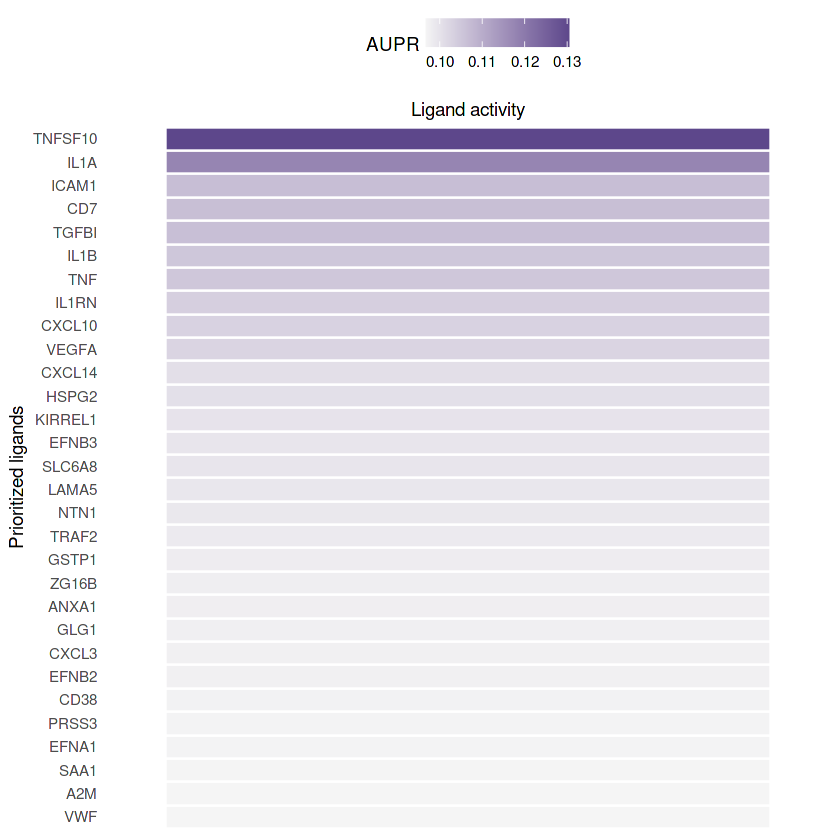

In [ ]:
ligand_aupr_matrix <- ligand_activities %>% filter(test_ligand %in% best_upstream_ligands) %>%
  column_to_rownames("test_ligand") %>% dplyr::select(aupr_corrected) %>% arrange(aupr_corrected)
vis_ligand_aupr <- as.matrix(ligand_aupr_matrix, ncol = 1)

p_ligand_aupr <- make_heatmap_ggplot(vis_ligand_aupr,
                     "Prioritized ligands", "Ligand activity",
                     legend_title = "AUPR", color = "mediumpurple4") +
    theme(axis.text.x.top = element_blank())

p_ligand_aupr

In [ ]:
ggsave("p_ligand_aupr1.pdf", plot = p_ligand_aupr, path = "./", width = 10, height = 8, dpi = 600)

In [ ]:
ggsave("p_ligand_aupr2.png", plot = p_ligand_aupr, path = "./", width = 1.2, height = 8, dpi = 600)

[1] 30 95

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


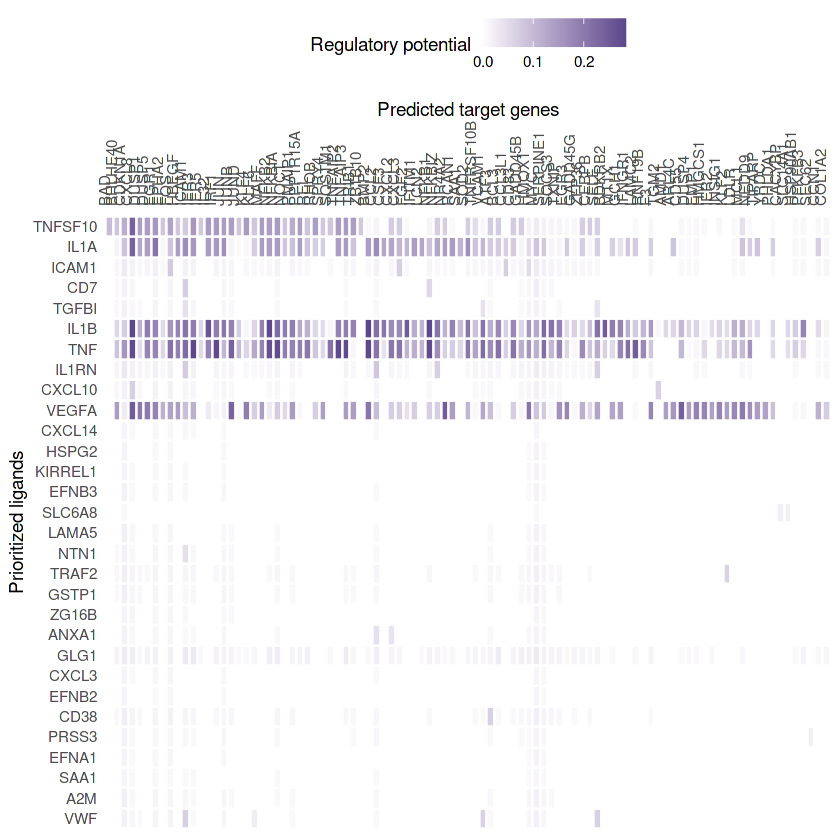

In [ ]:
# Target gene plot
active_ligand_target_links_df <- best_upstream_ligands %>%
  lapply(get_weighted_ligand_target_links,
         geneset = geneset_oi,
         ligand_target_matrix = ligand_target_matrix,
         n = 30) %>% #100
  bind_rows() %>% drop_na()

active_ligand_target_links <- prepare_ligand_target_visualization(
  ligand_target_df = active_ligand_target_links_df,
  ligand_target_matrix = ligand_target_matrix,
  cutoff = 0.33) #0.33

order_ligands <- intersect(best_upstream_ligands, colnames(active_ligand_target_links)) %>% rev()
order_targets <- active_ligand_target_links_df$target %>% unique() %>% intersect(rownames(active_ligand_target_links))

vis_ligand_target <- t(active_ligand_target_links[order_targets,order_ligands])
dim(vis_ligand_target)
p_ligand_target <- make_heatmap_ggplot(vis_ligand_target, "Prioritized ligands", "Predicted target genes",
                    color = "purple", legend_title = "Regulatory potential") +
  scale_fill_gradient2(low = "whitesmoke",  high = "mediumpurple4")

p_ligand_target

In [ ]:
write.csv(vis_ligand_target, file = "p_ligand_target.csv", row.names = TRUE)

In [ ]:
ggsave("p_ligand_target.pdf", plot = p_ligand_target, path = "./", width = 10, height = 8, dpi = 600)

In [ ]:
# Receptor plot
ligand_receptor_links_df <- get_weighted_ligand_receptor_links(
  best_upstream_ligands, expressed_receptors,
  lr_network, weighted_networks$lr_sig)

vis_ligand_receptor_network <- prepare_ligand_receptor_visualization(
  ligand_receptor_links_df,
  best_upstream_ligands,
  order_hclust = "both")

AA=t(vis_ligand_receptor_network)

# 创建 AA 和 vis_ligand_target 的矩阵（假设它们已经存在）
# 确保 AA 和 vis_ligand_target 行名是相同的

In [ ]:
# 假设 AA 和 vis_ligand_target 已经存在并且它们的行名是正确的

# 获取 AA 和 vis_ligand_target 行的交集
common_rows <- intersect(rownames(AA), rownames(vis_ligand_target))

# 检查是否所有 vis_ligand_target 的行都在 AA 中
missing_rows <- setdiff(rownames(vis_ligand_target), rownames(AA))

# 如果有缺失的行，提示
if(length(missing_rows) > 0) {
  cat("以下行在AA中缺失：\n")
  print(missing_rows)
} else {
  cat("所有行在AA中都有匹配。\n")

  # 确保 AA 中的行按照 vis_ligand_target 的行顺序排序
  AA_sorted <- AA[common_rows, ]
  AA_sorted <- AA_sorted[match(rownames(vis_ligand_target), rownames(AA_sorted)), ]

  # 显示排序后的 AA 矩阵
  print(AA_sorted)
}


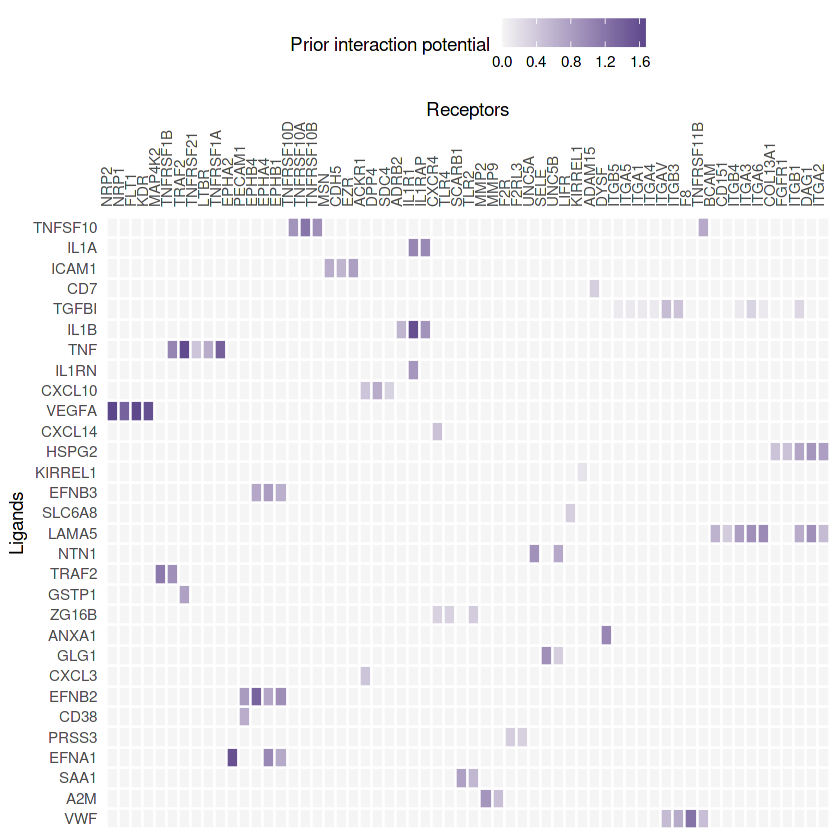

In [ ]:

p_ligand_receptor <- make_heatmap_ggplot(AA_sorted,
                     y_name = "Ligands", x_name = "Receptors",
                     color = "mediumpurple4", legend_title = "Prior interaction potential")

p_ligand_receptor

In [ ]:
write.csv(t(vis_ligand_receptor_network), file = "p_ligand_receptor.csv", row.names = TRUE)

In [ ]:
ggsave("p_ligand_receptor.pdf", plot = p_ligand_receptor, path = "./", width = 8, height = 8, dpi = 600)

In [ ]:
best_upstream_ligands_all %in% rownames(OBJ) %>% table()


.
TRUE 
  30 

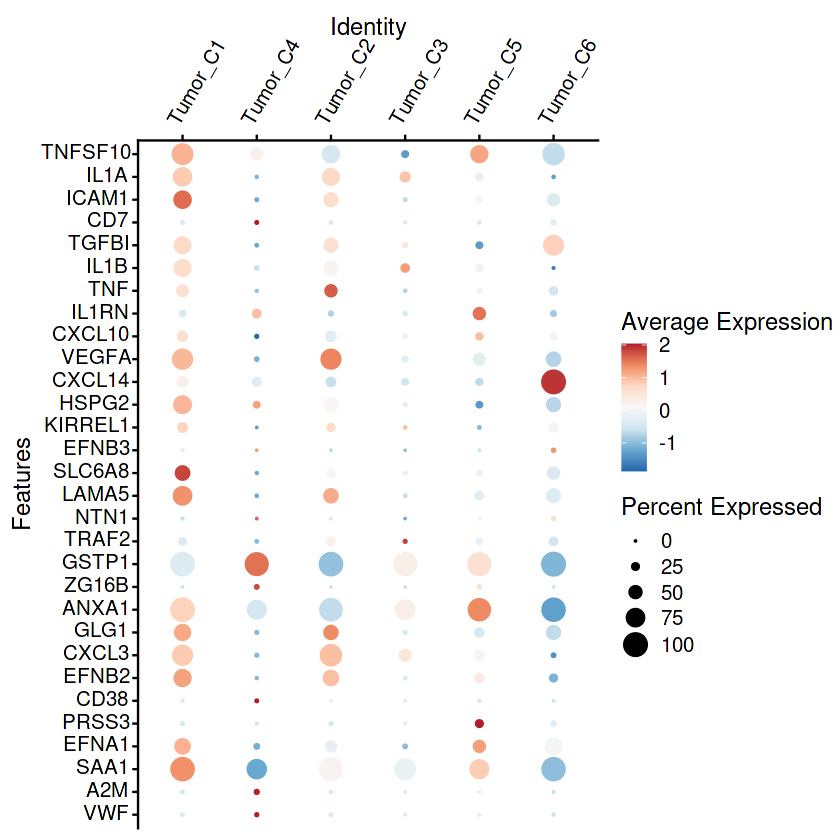

In [ ]:
# Dotplot of sender-focused approach
p_dotplot <- DotPlot(subset(OBJ, celltype %in% sender_celltypes),
        features = rev(best_upstream_ligands), cols = "RdBu") +
  coord_flip() +
  scale_y_discrete(position = "right") +
  theme(
    axis.text.x = element_markdown(angle = 60, hjust = 0),  # 解析 HTML 标签
    axis.text.y = element_markdown()  # 解析 HTML 标签
  )
p_dotplot

In [ ]:
ggsave("dotplot_sender_focused.pdf", plot = p_dotplot, path = "./", width = 6.5, height = 8, dpi = 600)

In [ ]:
df_meta <- OBJ@meta.data

df_counts <- df_meta %>%
  group_by(celltype, aggregate) %>%
  summarise(n_cells = n(), .groups = "drop")

df_counts_wide <- df_counts %>%
  pivot_wider(
    names_from  = "aggregate",
    values_from = "n_cells"
  )

df_counts_selected <- df_counts_wide %>%
  filter(smoker >= 3, non_smoker >= 3)

celltypes_with_3_plus <- df_counts_selected$celltype
celltypes_with_3_plus

valid_celltypes <- intersect(celltypes_with_3_plus, sender_celltypes)

[1] "ADH1B+CAF"           "B cells"             "CD4<sup>+</sup>T"   
 [4] "CD8<sup>+</sup>T"    "COL15A1+CAF"         "DC"                 
 [7] "Endo"                "FAP<sup>+</sup>EC"   "FLT1<sup>+</sup>EC" 
[10] "ITGA5<sup>+</sup>EC" "Lympatic_EC"         "MT+Fibro"           
[13] "Mast cells"          "Myeloid cells"       "NK cells"           
[16] "Neutrophils"         "Normal_Epi"          "POSTN<sup>+</sup>EC"
[19] "Pericytes"           "Plasma cells"        "RGS5<sup>+</sup>EC" 
[22] "RPL+Fibro"           "S100A+CAF"           "STC2+myCAF"         
[25] "Tumor_C4"            "Tumor_C5"

In [ ]:
celltype_order <- levels(Idents(OBJ))

# Use this if cell type labels are the identities of your Seurat object
# if not: indicate the celltype_col properly
DE_table_top_ligands <- lapply(
  celltype_order[celltype_order %in% valid_celltypes],
  get_lfc_celltype,
  seurat_obj = OBJ,
  condition_colname = "aggregate",
  condition_oi = condition_oi,
  condition_reference = condition_reference,
  celltype_col = "celltype",
  min.pct = 0, logfc.threshold = 0,
  features = best_upstream_ligands
)

DE_table_top_ligands <- DE_table_top_ligands %>%  purrr::reduce(., full_join) %>%
  column_to_rownames("gene")

vis_ligand_lfc <- as.matrix(DE_table_top_ligands[rev(best_upstream_ligands), , drop = FALSE])

Joining with `by = join_by(gene)`


In [ ]:
write.csv(vis_ligand_lfc, file = "p_lfc.csv", row.names = TRUE)

In [ ]:
ggsave("p_lfc.png", plot = p_lfc, path = "./", width = 6.5, height = 7.5, dpi = 300)

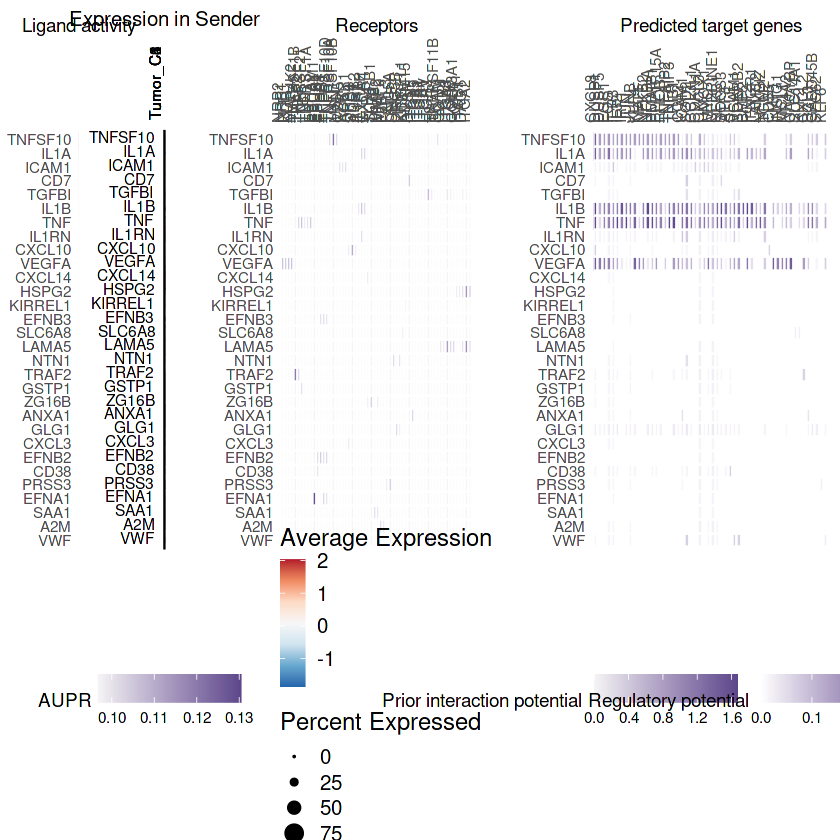

In [ ]:
library(ggtext)

figures_without_legend <- cowplot::plot_grid(
  p_ligand_aupr + theme(legend.position = "none"),
  p_dotplot + theme(legend.position = "none",
                    axis.ticks = element_blank(),
                    axis.title.y = element_blank(),
                    axis.title.x = element_markdown(size = 12),  # 使用 element_markdown
                    axis.text.y = element_markdown(size = 9),    # 使用 element_markdown
                    axis.text.x = element_markdown(size = 9, angle = 90, hjust = 0)) +
    ylab("Expression in Sender"),
  p_ligand_receptor + theme(legend.position = "none",
                axis.title.y = element_blank()),
  p_ligand_target + theme(legend.position = "none",
                          axis.title.y = element_blank()),
  align = "hv",
  nrow = 1,
  rel_widths = c(0.8, 1.5, 4.2, 4.8)
)

legends <- cowplot::plot_grid(
    ggpubr::as_ggplot(ggpubr::get_legend(p_ligand_aupr)),
    ggpubr::as_ggplot(ggpubr::get_legend(p_dotplot)),
    ggpubr::as_ggplot(ggpubr::get_legend(p_ligand_receptor)),
    ggpubr::as_ggplot(ggpubr::get_legend(p_ligand_target)),
    nrow = 1,
    align = "h", rel_widths = c(1.5, 1, 1, 1))

combined_plot <-  cowplot::plot_grid(figures_without_legend, legends, rel_heights = c(10,5), nrow = 2, align = "hv")
combined_plot

In [ ]:
ggsave(
  filename = "combined_plot2.png",
  plot = combined_plot,
  path = getwd(),
  width = 19,
  height = 11,
  units = "in",
  dpi = 600    ,limitsize = FALSE
)
